# Midterm Project

K-State Honor Pledge:  "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

Kyle Ball


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
print(sns.__version__) 
import plotly.graph_objects as go
import plotly.express as px

pd.options.display.max_rows = 16


%matplotlib inline

0.9.0


In [4]:
! pip install plotly==4.1.0

In [5]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
#df.corr
#handle missing values first shows correlations between variables and say IDMB score kind of gives direction to awnsering quesions 
# explore outliers could drop ect.
#seperate data into geners will show python way of how to do that on discussion form
#drop missing rows with missing values like gross
# dont hesitate to write new columns and generate more. Created profit column ROI column = profit/budget * 100 can be creative to this.
#drop unimporant columns dont be afraid
# find data colab that he sthare DA demo plot

# 1. Background of Project

# 1.1 The project
The background of this project is to predict movie success. Although this can be measured in different ways like profit we are looking at succes as IMDB scores. 

Taking the perspective that I am hired to help with movie success I would obtain data of movies with lots of information about each movie. I would also get data that would pretain to movies and data about them that we can use for anaylsis. The main question and one that we are trying to answer is how to increase a moives IMDB score. 

 # 1.2 Goals and Insights
 The things that we are looking to accomplish
 - To give film companies insight on how to create more succesful movies by showing visualizations and using data analysis from the data set to show which variales are imporant to movie success. 
 - Using this data set of over 5000 movies with IMDB scores we will find insights to these business questions and find helpful results to accomplish this for film companies. 
 

# 1.3 Variables associated with IMDB score 

In [7]:
df.corr()
#looking at this shows which things are correlated with idmb score which vairables should we look into more etc. 

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


Vairables that are correlated to higher IMDB scores
- Number of Crtitic Reviews
- Duration
- Director FB likes
- Gross
- Number of Users
- Number of User Reviews
- Movie FB likes

In [8]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
              ... 
Czech            1
Filipino         1
Dzongkha         1
Maya             1
Aramaic          1
Vietnamese       1
Tamil            1
Telugu           1
Name: language, Length: 47, dtype: int64

This shows that the majority of the films are in English
- Some of the varaibles have already been dropped because I have went back and added this after I cleaned some of the data.

# 2.1 
## Tidying up the geners by splitting them

In [9]:
genres = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.imdb_score).stack()
genres = genres.reset_index()[[0, 'imdb_score']] 
genres.columns = ['genres', 'imdb_score'] 
genres.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


Here we are able to see which geners get higher scores than others
- This shows that the lowest IMDB score genre is Action
- Doing this will allow us to dive deeper into finding out how to help movie companies recieve higher IMDB scores

# 2.2 Characteristics of the Movies

In [10]:
df.groupby('duration').size().sort_values(ascending = False)

duration
90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
93.0     129
99.0     124
95.0     124
        ... 
219.0      1
63.0       1
62.0       1
225.0      1
59.0       1
58.0       1
226.0      1
511.0      1
Length: 191, dtype: int64

- We see with movie duration that the highest number of movies are 101 minutes long
- Not many are extermly high or low as we see at the bottom with only one movie with a certain time duration

In [11]:
df.groupby('content_rating').size().sort_values(ascending = False)

content_rating
R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
             ... 
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Length: 18, dtype: int64

This shows us that most of the mobies in this database are rated R followed by PG-13 and PG
These three are the highest number of content rating out of all the movies in dataset

# 3 Data Cleaning 

# 3.1 Look at Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Here we are able to see which are categorical variables and which are numerical 
- 12 Are category variables (dont contain numbers, just name values)
- 16 are numerical 

In [13]:
df.describe()
#Looking at some statistical anaylsis to get a better understanding

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


This shows us some statistical anaylsis that will give us a better understanding

# 3.2 Drop Duplicates
- Also do some cleaning of the data

This will get rid of rows that are redudent in the data set and clean up the data

In [14]:
df.country = df.country.fillna(' ')

In [15]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,,NaN,NaN,NaN,12.0,7.1,NaN,0


This allows us to get rid of NaN for the county column that were left blank. We cant assume what they were by filling in a value so we will create NaNs as blank

In [16]:
df= df.drop_duplicates(subset = 'movie_title')

In [17]:
df.isnull().sum()

color                       19
director_name              102
num_critic_for_reviews      49
duration                    15
director_facebook_likes    102
actor_3_facebook_likes      23
actor_2_name                13
actor_1_facebook_likes       7
                          ... 
country                      0
content_rating             300
budget                     484
title_year                 106
actor_2_facebook_likes      13
imdb_score                   0
aspect_ratio               326
movie_facebook_likes         0
Length: 28, dtype: int64

In [18]:
df = df[np.isfinite(df['budget'])]
df.isnull().sum()

color                       14
director_name                8
num_critic_for_reviews      31
duration                     5
director_facebook_likes      8
actor_3_facebook_likes      16
actor_2_name                10
actor_1_facebook_likes       6
                          ... 
country                      0
content_rating             205
budget                       0
title_year                   8
actor_2_facebook_likes      10
imdb_score                   0
aspect_ratio               230
movie_facebook_likes         0
Length: 28, dtype: int64

In [19]:
df = df.dropna(subset = ['content_rating'])
df.isnull().sum()

color                       11
director_name                5
num_critic_for_reviews      15
duration                     1
director_facebook_likes      5
actor_3_facebook_likes       7
actor_2_name                 2
actor_1_facebook_likes       1
                          ... 
country                      0
content_rating               0
budget                       0
title_year                   5
actor_2_facebook_likes       2
imdb_score                   0
aspect_ratio               141
movie_facebook_likes         0
Length: 28, dtype: int64

In [20]:
df = df[np.isfinite(df['gross'])]
df.isnull().sum()

color                       2
director_name               0
num_critic_for_reviews      1
duration                    0
director_facebook_likes     0
actor_3_facebook_likes      6
actor_2_name                2
actor_1_facebook_likes      1
                           ..
country                     0
content_rating              0
budget                      0
title_year                  0
actor_2_facebook_likes      2
imdb_score                  0
aspect_ratio               55
movie_facebook_likes        0
Length: 28, dtype: int64

In [21]:
df = df.dropna(subset = ['aspect_ratio'])
df.isnull().sum()

color                      2
director_name              0
num_critic_for_reviews     1
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     5
actor_2_name               1
actor_1_facebook_likes     0
                          ..
country                    0
content_rating             0
budget                     0
title_year                 0
actor_2_facebook_likes     1
imdb_score                 0
aspect_ratio               0
movie_facebook_likes       0
Length: 28, dtype: int64

In [22]:
df = df.replace({'actor_2_facebook_likes': 0}, {'actor_2_facebook_likes': np.nan})
df = df.fillna({'actor_2_facebook_likes' : df['actor_2_facebook_likes'].mean()})

df = df.fillna({'facenumber_in_poster' : df['facenumber_in_poster'].mean()})

df = df.replace({'director_facebook_likes': 0}, {'director_facebook_likes': np.nan})
df = df.fillna({'director_facebook_likes' : df['director_facebook_likes'].mean()})

df = df.replace({'actor_3_facebook_likes': 0}, {'actor_3_facebook_likes': np.nan})
df = df.fillna({'actor_3_facebook_likes' : df['actor_3_facebook_likes'].mean()})

df = df.replace({'cast_total_facebook_likes': 0}, {'cast_total_facebook_likes': np.nan})
df = df.fillna({'cast_total_facebook_likes' : df['cast_total_facebook_likes'].mean()})

df = df.replace({'actor_1_facebook_likes': 0}, {'actor_1_facebook_likes': np.nan})
df = df.fillna({'actor_1_facebook_likes' : df['actor_1_facebook_likes'].mean()})

df = df.replace({'movie_facebook_likes': 0}, {'movie_facebook_likes': np.nan})
df = df.fillna({'movie_facebook_likes' : df['movie_facebook_likes'].mean()})

df = df.replace({'num_critic_for_reviews': 0}, {'num_critic_for_reviews': np.nan})
df = df.fillna({'num_critic_for_reviews' : df['num_critic_for_reviews'].mean()})

df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,972.934925,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000
1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325
2,Color,Sam Mendes,602.0,148.0,972.934925,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000
3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000
5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000
6,Color,Sam Raimi,392.0,156.0,972.934925,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,17095.270325
7,Color,Nathan Greno,324.0,100.0,15.000000,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000.000000
8,Color,Joss Whedon,635.0,141.0,972.934925,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000.000000
9,Color,David Yates,375.0,153.0,282.000000,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.000000
10,Color,Zack Snyder,673.0,183.0,972.934925,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000.000000


- Also replaced the null NaN values to get a better understanding by filling in the data with the mean.
- This helped clean the data so we can get a better picture when analyzing the data further


# 3.3 Create New Column

Creating a new column called profit

In [23]:
df['profit'] = df['gross'] - df['budget']
#source stockoverflow
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,972.934925,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325,9404152.0
2,Color,Sam Mendes,602.0,148.0,972.934925,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000,-190641321.0


In [24]:
df.sort_values(by='profit', ascending=False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,972.934925,855.000000,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000.000000,5.235058e+08
29,Color,Colin Trevorrow,644.0,124.0,365.000000,1000.000000,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,1.500000e+08,2015.0,2000.0,7.0,2.00,150000.000000,5.021773e+08
26,Color,James Cameron,315.0,194.0,972.934925,794.000000,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,2.000000e+08,1997.0,14000.0,7.7,2.35,26000.000000,4.586723e+08
3024,Color,George Lucas,282.0,125.0,972.934925,504.000000,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,1.100000e+07,1977.0,1000.0,8.7,2.35,33000.000000,4.499357e+08
3080,Color,Steven Spielberg,215.0,120.0,14000.000000,548.000000,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,...,English,USA,PG,1.050000e+07,1982.0,725.0,7.9,1.85,34000.000000,4.244495e+08
17,Color,Joss Whedon,703.0,173.0,972.934925,19000.000000,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,2.200000e+08,2012.0,21000.0,8.1,1.85,123000.000000,4.032795e+08
509,Color,Roger Allers,186.0,73.0,28.000000,847.000000,Nathan Lane,2000.0,422783777.0,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,4.500000e+07,1994.0,886.0,8.5,1.66,17000.000000,3.777838e+08
240,Color,George Lucas,320.0,136.0,972.934925,1000.000000,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,1.150000e+08,1999.0,14000.0,6.5,2.35,13000.000000,3.595447e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,Color,Karan Johar,20.0,193.0,160.000000,860.000000,John Abraham,8000.0,3275443.0,Drama,...,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659.000000,-6.967246e+08


In [25]:
df.sort_values(by=['profit', 'movie_title'],ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,972.934925,855.000000,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000.000000,5.235058e+08
29,Color,Colin Trevorrow,644.0,124.0,365.000000,1000.000000,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,1.500000e+08,2015.0,2000.0,7.0,2.00,150000.000000,5.021773e+08
26,Color,James Cameron,315.0,194.0,972.934925,794.000000,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,2.000000e+08,1997.0,14000.0,7.7,2.35,26000.000000,4.586723e+08
3024,Color,George Lucas,282.0,125.0,972.934925,504.000000,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,1.100000e+07,1977.0,1000.0,8.7,2.35,33000.000000,4.499357e+08
3080,Color,Steven Spielberg,215.0,120.0,14000.000000,548.000000,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,...,English,USA,PG,1.050000e+07,1982.0,725.0,7.9,1.85,34000.000000,4.244495e+08
17,Color,Joss Whedon,703.0,173.0,972.934925,19000.000000,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,2.200000e+08,2012.0,21000.0,8.1,1.85,123000.000000,4.032795e+08
509,Color,Roger Allers,186.0,73.0,28.000000,847.000000,Nathan Lane,2000.0,422783777.0,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,4.500000e+07,1994.0,886.0,8.5,1.66,17000.000000,3.777838e+08
240,Color,George Lucas,320.0,136.0,972.934925,1000.000000,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,1.150000e+08,1999.0,14000.0,6.5,2.35,13000.000000,3.595447e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,Color,Karan Johar,20.0,193.0,160.000000,860.000000,John Abraham,8000.0,3275443.0,Drama,...,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659.000000,-6.967246e+08


This allows us to see which movies generated the greatest profit in ascedning order. It also allows us to see other cahracteristics about the movie as well that let it be succesful in the box office.

In [26]:
#2 df['variable'].value.counts().head(10)
#pulls up how much time it comes up or is mentioned 

# 3.4 Is color Influential 

In [27]:
df['color'].value_counts()

Color               3560
 Black and White     121
Name: color, dtype: int64

We see that in the database that most of the movies are in color rather than black and white
- 3658 in color
- 124 in Black and White
Given this information Color seems to be the most used by movie companies holding  96% of movies in database

# 3.5 What generes generate the most money

In [28]:
df['genres'].value_counts()# gross, title year , facebook likes,

Comedy|Drama|Romance                   145
Drama                                  143
Comedy|Drama                           138
Comedy                                 138
Comedy|Romance                         130
Drama|Romance                          113
Crime|Drama|Thriller                    79
Action|Crime|Thriller                   54
                                      ... 
Adventure|Comedy|Drama|Music             1
Comedy|Family|Music|Musical              1
Biography|Crime|Documentary|History      1
Adventure|Comedy|Fantasy|Sci-Fi          1
Crime|Documentary|Drama                  1
Biography|Comedy|Drama|Sport             1
Comedy|Documentary|War                   1
Action|Comedy|Mystery|Romance            1
Name: genres, Length: 747, dtype: int64

In [29]:
genres = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.profit).stack()
genres = genres.reset_index()[[0, 'profit']] 
genres.columns = ['genres', 'profit'] 
genres.head(3)

,genres,profit
0,Action,523505847.0
1,Adventure,523505847.0
2,Fantasy,523505847.0


This shows us that the three most profitable movies were these geners:
- Action
- Adventure
- Fantasy



# 4 Data Visualization
work more on

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 5042
Data columns (total 29 columns):
color                        3681 non-null object
director_name                3683 non-null object
num_critic_for_reviews       3683 non-null float64
duration                     3683 non-null float64
director_facebook_likes      3683 non-null float64
actor_3_facebook_likes       3683 non-null float64
actor_2_name                 3682 non-null object
actor_1_facebook_likes       3683 non-null float64
gross                        3683 non-null float64
genres                       3683 non-null object
actor_1_name                 3683 non-null object
movie_title                  3683 non-null object
num_voted_users              3683 non-null int64
cast_total_facebook_likes    3683 non-null float64
actor_3_name                 3678 non-null object
facenumber_in_poster         3683 non-null float64
plot_keywords                3668 non-null object
movie_imdb_link              3683 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a219cf940>]],
      dtype=object)

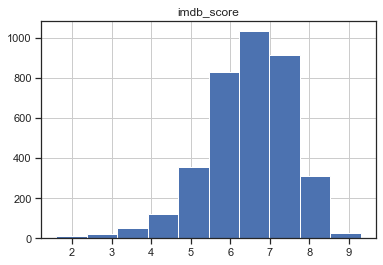

In [31]:
df.hist('imdb_score')

This histogram bar blot shows us that most movies received a score of between 6-8 out of the data set.
- Very few of the movies received a high score of 8 or 9 which indicates movie success in this exploratory anaylsis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a219cf860>]],
      dtype=object)

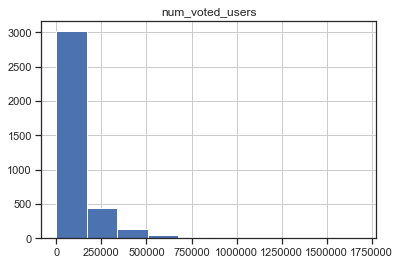

In [32]:
df.hist('num_voted_users')

Very few movies recieved a lot of reviews from users, the majority is skewed between 0 and 250,000 

In [33]:
df.genres.value_counts()

Comedy|Drama|Romance                   145
Drama                                  143
Comedy|Drama                           138
Comedy                                 138
Comedy|Romance                         130
Drama|Romance                          113
Crime|Drama|Thriller                    79
Action|Crime|Thriller                   54
                                      ... 
Adventure|Comedy|Drama|Music             1
Comedy|Family|Music|Musical              1
Biography|Crime|Documentary|History      1
Adventure|Comedy|Fantasy|Sci-Fi          1
Crime|Documentary|Drama                  1
Biography|Comedy|Drama|Sport             1
Comedy|Documentary|War                   1
Action|Comedy|Mystery|Romance            1
Name: genres, Length: 747, dtype: int64

This shows the top movies with their geners 

We will go into more detail next

In [34]:
df['genres'] = df['genres'].str.replace('|', ' ')

In [35]:
df['genres'] = df['genres'].str.split()
df.genres.head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [36]:
df['genres'] = df['genres'].apply(lambda x : x[0])

In [37]:
df['genres'].value_counts()

Comedy         981
Action         927
Drama          655
Adventure      360
Crime          249
Biography      205
Horror         156
Animation       46
              ... 
Documentary     29
Mystery         23
Sci-Fi           7
Western          3
Family           3
Musical          2
Romance          1
Thriller         1
Name: genres, Length: 17, dtype: int64

This is showing us the top movie genres 
- Comedys 719
- Action 648
- Drama 494 
- Aventure 267
- Crime 170
These are the top 5 genres 

Text(0.5, 1.0, 'idmb_score')

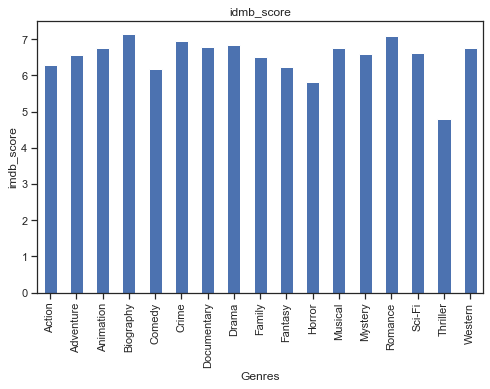

In [38]:
plt.figure(figsize= [8,5])
df.groupby('genres')['imdb_score'].mean().plot(kind= 'bar')
plt.ylabel('imdb_score')
plt.xlabel('Genres')
plt.title('idmb_score')


This shows us genres and their mean rated idmb score

In [39]:
df.groupby(['movie_facebook_likes', 'imdb_score']).mean()

num_critic_for_reviews  duration  \
movie_facebook_likes imdb_score                                     
11.0                 5.6                     164.312873     103.0   
12.0                 5.6                      15.000000     106.0   
13.0                 4.1                       3.000000      78.0   
19.0                 6.6                       4.000000     100.0   
26.0                 6.6                      23.000000      89.0   
27.0                 6.1                      12.000000      88.0   
30.0                 5.3                      32.000000      87.0   
                     6.2                      47.000000     107.0   
...                                                 ...       ...   
165000.0             8.1                     454.000000     114.0   
166000.0             7.9                     645.000000     182.0   
175000.0             8.8                     642.000000     148.0   
190000.0             8.1                     556.000000     156.0   
191000.0             8.1                     739.000000     120.0   
197000.0             6.9                     673.000000     183.0   
199000.0             8.5                     765.000000     165.0   
349000.0             8.6                     712.000000     169.0   

                                 director_facebook_likes  \
movie_facebook_likes imdb_score                            
11.0                 5.6                      972.934925   
12.0                 5.6                       16.000000   
13.0                 4.1                        6.000000   
19.0                 6.6                      972.934925   
26.0                 6.6                      269.000000   
27.0                 6.1                      972.934925   
30.0                 5.3                      972.934925   
                     6.2                       11.000000   
...                                                  ...   
165000.0             8.1                       77.000000   
166000.0             7.9                      972.934925   
175000.0             8.8                    22000.000000   
190000.0             8.1                      972.934925   
191000.0             8.1                      750.000000   
197000.0             6.9                      972.934925   
199000.0             8.5                    16000.000000   
349000.0             8.6                    22000.000000   

                                 actor_3_facebook_likes  \
movie_facebook_likes imdb_score                           
11.0                 5.6                           20.0   
12.0                 5.6                          254.0   
13.0                 4.1                           17.0   
19.0                 6.6                          266.0   
26.0                 6.6                           24.0   
27.0                 6.1                            3.0   
30.0                 5.3                          153.0   
                     6.2                          419.0   
...                                                 ...   
165000.0             8.1                          305.0   
166000.0             7.9                          773.0   
175000.0             8.8                        23000.0   
190000.0             8.1                          733.0   
191000.0             8.1                          943.0   
197000.0             6.9                         2000.0   
199000.0             8.5                          265.0   
349000.0             8.6                         6000.0   

                                 actor_1_facebook_likes        gross  \
movie_facebook_likes imdb_score                                        
11.0                 5.6                           23.0      23616.0   
12.0                 5.6                          602.0     171988.0   
13.0                 4.1                           32.0     243768.0   
19.0                 6.6                         1000.0    2024854.0   
26.0                 6.6  

Text(0.5, 1.0, 'Duration vs Imdb score')

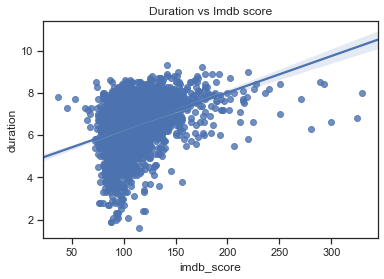

In [40]:
sns.regplot(x='duration', y= 'imdb_score', data=df)
plt.ylabel('duration')
plt.xlabel('imdb_score')
plt.title('Duration vs Imdb score')

In [41]:
df2 = df.sort_values('imdb_score', ascending = False).head(50)

px.scatter(df2, x="imdb_score", y="duration", hover_name='movie_title', color = 'content_rating', title = 'Duration vs IMDB Score', trendline = 'ols')

/Users/Kyle2/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/Kyle2/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/Kyle2/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/Kyle2/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



This shows us the correlation or line of best fit (regression) of Movie running time vs the idmb score recieved

Text(0.5, 1.0, 'Face Book Likes  vs Imdb score')

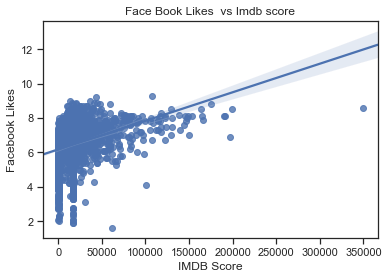

In [42]:
sns.regplot(x='movie_facebook_likes', y= 'imdb_score', data=df)
plt.ylabel('Facebook Likes')
plt.xlabel('IMDB Score')
plt.title('Face Book Likes  vs Imdb score')

This shows us the rating of the IMDB scores based on the face book likes that each moive recieved

Text(0.5, 1.0, 'Budget  vs Imdb score')

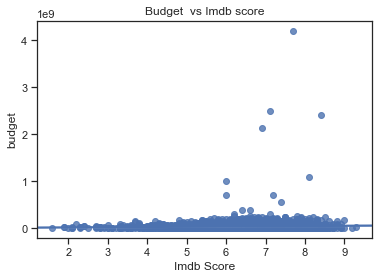

In [43]:
sns.regplot(x='imdb_score', y= 'budget', data=df)
plt.ylabel('budget')
plt.xlabel('Imdb Score')
plt.title('Budget  vs Imdb score')

This shows us that most movie budgets did not have an impact on the out come of the 'success' of the movie
- Some movies had really high budgets and did recieve higher scoring but for the most part this did not have an impact

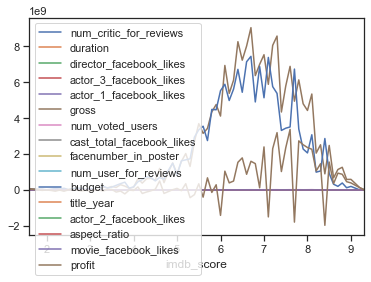

In [44]:
df.groupby('imdb_score').sum().plot();

This chart is kind of hard to understand but is interesting on how all of these factors contribute to IMDB score

In [45]:
df = df.loc[df['title_year'] >= 2000]
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,972.934925,855.0,Joel David Moore,1000.0,760505847.0,Action,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325,9404152.0
2,Color,Sam Mendes,602.0,148.0,972.934925,161.0,Rory Kinnear,11000.0,200074175.0,Action,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,Action,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,Action,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,972.934925,4000.0,James Franco,24000.0,336530303.0,Action,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,17095.270325,78530303.0
7,Color,Nathan Greno,324.0,100.0,15.000000,284.0,Donna Murphy,799.0,200807262.0,Adventure,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000.000000,-59192738.0
8,Color,Joss Whedon,635.0,141.0,972.934925,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000.000000,208991599.0
9,Color,David Yates,375.0,153.0,282.000000,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.000000,51956980.0
10,Color,Zack Snyder,673.0,183.0,972.934925,2000.0,Lauren Cohan,15000.0,330249062.0,Action,...,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000.000000,80249062.0


Text(0, 0.5, 'Director')

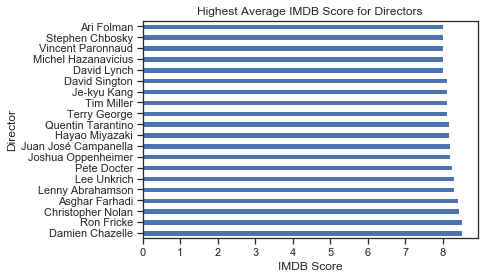

In [46]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20).plot(kind = 'barh')

plt.title('Highest Average IMDB Score for Directors')
plt.xlabel('IMDB Score')
plt.ylabel('Director')

This shows us the Directors who have the highest IMDB score average of the movies they produced. Having these directors does not guarentee a good IMDB score but based on the data it is likely they will have a higher avg score than other directors

In [47]:
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False).head(20)

director_name
Damien Chazelle        8.500000
Ron Fricke             8.500000
Christopher Nolan      8.425000
Asghar Farhadi         8.400000
Lenny Abrahamson       8.300000
Lee Unkrich            8.300000
Pete Docter            8.233333
Joshua Oppenheimer     8.200000
                         ...   
Tim Miller             8.100000
Je-kyu Kang            8.100000
David Sington          8.100000
David Lynch            8.000000
Michel Hazanavicius    8.000000
Vincent Paronnaud      8.000000
Stephen Chbosky        8.000000
Ari Folman             8.000000
Name: imdb_score, Length: 20, dtype: float64

# 5 Corr Analysis

In [48]:
df = df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name','movie_imdb_link', 'movie_title', 'plot_keywords'] , axis = 1)
df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000,523505847.0
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325,9404152.0
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000,-44925825.0
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000,198130642.0
5,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000,-190641321.0


In [49]:
df = df.drop('profit', axis = 1)
df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000
5,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 5042
Data columns (total 21 columns):
color                        2669 non-null object
num_critic_for_reviews       2671 non-null float64
duration                     2671 non-null float64
director_facebook_likes      2671 non-null float64
actor_3_facebook_likes       2671 non-null float64
actor_1_facebook_likes       2671 non-null float64
gross                        2671 non-null float64
genres                       2671 non-null object
num_voted_users              2671 non-null int64
cast_total_facebook_likes    2671 non-null float64
facenumber_in_poster         2671 non-null float64
num_user_for_reviews         2671 non-null float64
language                     2670 non-null object
country                      2671 non-null object
content_rating               2671 non-null object
budget                       2671 non-null float64
title_year                   2671 non-null float64
actor_2_facebook_likes       2671

In [51]:
df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000
5,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000


In [52]:
df1 = df

In [53]:
genres.head()

,genres,profit
0,Action,523505847.0
1,Adventure,523505847.0
2,Fantasy,523505847.0
3,Sci-Fi,523505847.0
4,Action,9404152.0


In [54]:
genres = pd.get_dummies(genres, columns = ['genres'])
genres.head()

,profit,genres_Action,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,...,genres_Horror,genres_Music,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Sport,genres_Thriller,genres_War,genres_Western
0,523505847.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,523505847.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,523505847.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,523505847.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9404152.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
filt= (df['country']!= 'USA') & (df['country']!='UK')
df['country']=np.where(filt,'Other', df['country'])
df['country'].value_counts()

USA      2094
Other     361
UK        216
Name: country, dtype: int64

In [56]:
df = pd.get_dummies(df, columns = ['content_rating', 'country'])
df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,0,0,0,0,1,0,0,0,0,1
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,0,0,0,0,1,0,0,0,0,1
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,0,0,0,0,1,0,0,0,1,0
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,0,0,0,0,1,0,0,0,0,1
5,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,0,0,0,0,1,0,0,0,0,1


# Correlation Analysis

In [57]:
df.corr()['imdb_score'][:].sort_values(ascending = False).head(10)

imdb_score                 1.000000
num_voted_users            0.474710
num_critic_for_reviews     0.438379
duration                   0.370015
movie_facebook_likes       0.335251
num_user_for_reviews       0.317354
gross                      0.210756
director_facebook_likes    0.199803
content_rating_R           0.154076
country_UK                 0.123372
Name: imdb_score, dtype: float64

This shows us the correlation of what correlates with higher IMDB scores
 We see that some of the top things that correlate are
 - Number of Voted Users
 - Number of Critic Reviews
 - Duration
 - Facebook Likes
 - Gross
 - Content rating 
 These are some of the highest correlated values and higher IMDB scores or movie success

In [58]:
df.corr()['imdb_score'][:].sort_values(ascending = False).tail(50)

imdb_score                  1.000000
num_voted_users             0.474710
num_critic_for_reviews      0.438379
duration                    0.370015
movie_facebook_likes        0.335251
num_user_for_reviews        0.317354
gross                       0.210756
director_facebook_likes     0.199803
                              ...   
content_rating_Not Rated    0.037270
content_rating_Unrated      0.028016
content_rating_NC-17        0.022667
content_rating_G           -0.017609
content_rating_PG          -0.080979
facenumber_in_poster       -0.096542
content_rating_PG-13       -0.107032
country_USA                -0.169988
Name: imdb_score, Length: 26, dtype: float64

This shows us the flip side of the coin and shows us the things that cause lower correlation or negative correlations with higher imdb scores
Some of the top negative correlating things are 
- PG and PG 13 Rating
- Budget of film
- Title Year
- Country
These things have little or oppostie correlation to IMDB score or movie success


Based on the findings in correlation we can say that if one variable goes up in value then others tend to go up in value as well and that they are correlated.
This is important for movie studios so they can plan on focusing on certain areas like facebook to get more attention to movies. This will help them get more likes and get more people in theaters to see the movie for example. This in turn then increases the gross profit of the movie

# 6.1 Storytelling

Higher duration of the movie will lead to other factors increasing as well with correlation
- More people will view the movie
 - Number of Critic Revies will increase
 - Number of Users will increase
 - IMDB score will increase
These things will cause for more coverage and exposure for that given movie. If the movie has success with these groups of people then more people will hear and want to go see the movie just based on these things increasing. This leads to more success at the box office in terms of profit

Number of Facebook likes
- This was a very high correlation in the data when this variable increased many others did the same
- The more facebook likes lead to more people in terms of critics and number of voters rating the movie.
- Number of people going and liking the movie also means more people went to go see the movie as well leading to more exposure.

# 6.2 Content Rating
Content rating also had an effect of IMDB scores, the recomendation for movie producers would be to focus the movies they produce into these rating categories

- NC-17, G, PG, X All had negative impacts on IMDB score. Although this doesnt mean for certain that a movie in this rating category wont be succesful. This just shows that it can make it harder to achieve. This is probably because of the audeinces who go to see these movies. 


- In terms of the audience these content rating directly make the groups of people who will go to see the movie smaller. For G and PG the audiences are mostly younger children and their parents who will attend the film. This means in turn that the majority of adults will not go see it. This causes for other variables to be effected and in turn effect the succes of the movie


- On the flip side NC-17 and X did not recieve very high scores. This would be because you are limiting your audience to only adults and also most adults will not go see these types of movies in theaters. This effects exposure on social media and reviews. 

# 6.3 Directors

The Directors of movies did have some interesting reults that we should discuss

- The Director that you hire to lead your movie is imporant for the movies success. In terms of the business this directly affects the outcome of the movie. Certain directors averaged very high IMDB scores

- The Top 20 directors averaged between 8 and 8.5 movie rating
Here is some of the  list of the top directors found by looking through the data



# Summary 
- The recommendation of this data analyst would be to have a movie with a high quality director mentioned in the list above as the first step. 


- To allow for a bigger audience attraction and people who will want to see the movie they should also have the movie not be rated NC-17, G, PG, X. 

- To increase certain variables that lead to higher movie succes film companies will want to promote more to facebook users to increase the number of reviews and likes. This in turn increases the number of critic reivews as well who will do the promoting of the movie for you per their review. 


- Budget does not have a high correlation to movie success so it is wrong of movie companies to think that pouring money into a movie will lead it to being profitable and more succesful. This does not increase the chance of it recieving a higher IMDB rating.

- The movie should also be in color this was the majority in the database and the majority of the higher rated movies were in color

- Duration also played apart movies that had higher duration did have higher correlated movie success vs those with lower than average duration

# Project Part 2

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn import linear_model

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import plotly.express as px


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import scikitplot as skplt

from pandas.plotting import scatter_matrix

import pingouin as pg

import warnings
warnings.filterwarnings("ignore")


#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# feature selection
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import chi2



In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 5042
Data columns (total 29 columns):
color                        2669 non-null object
num_critic_for_reviews       2671 non-null float64
duration                     2671 non-null float64
director_facebook_likes      2671 non-null float64
actor_3_facebook_likes       2671 non-null float64
actor_1_facebook_likes       2671 non-null float64
gross                        2671 non-null float64
genres                       2671 non-null object
num_voted_users              2671 non-null int64
cast_total_facebook_likes    2671 non-null float64
facenumber_in_poster         2671 non-null float64
num_user_for_reviews         2671 non-null float64
language                     2670 non-null object
budget                       2671 non-null float64
title_year                   2671 non-null float64
actor_2_facebook_likes       2671 non-null float64
imdb_score                   2671 non-null float64
aspect_ratio                 26

In [146]:
df.isnull().sum()

color                       2
num_critic_for_reviews      0
duration                    0
director_facebook_likes     0
actor_3_facebook_likes      0
actor_1_facebook_likes      0
gross                       0
genres                      0
                           ..
content_rating_Not Rated    0
content_rating_PG           0
content_rating_PG-13        0
content_rating_R            0
content_rating_Unrated      0
country_Other               0
country_UK                  0
country_USA                 0
Length: 29, dtype: int64

After going through the data base and all of the data there are recommendations for movie producers in terms of getting higher movie succes by means of rating movie succes on IMDB scores.

The data shows us that there are factors that will help lead to higher IMDB scores
- Some of those factors are:
- -Higher duration of the movie

If movie producers want succesful movies this is the first place to start because of how big of an impact movie directors have in the outcome of the whole movie process. Having one of these top directors will help increase IMDB score for the movie they want to produce. This in turn helps lead to many other variables going up and lead to hopefully more profit for the movie companies with higher quality movies (IMDB score).

Top 8 Directors
- Damien Chazelle        8.500000
- Ron Fricke             8.500000
- Christopher Nolan      8.425000
- Asghar Farhadi         8.400000
- Lenny Abrahamson       8.300000
- Lee Unkrich            8.300000
- Pete Docter            8.233333
- Joshua Oppenheimer     8.200000

- Genres that were comedys recieved lower correlations rather than Dramas so the type of movie that is produced does matter. However these were the results of the most popular movie genres and their average IMDB scores

- Action	7.9
- Adventure	7.9
- Fantasy	7.9
- Sci-Fi	7.9
- Action	7.1

Using these recommedations as guidelines going forward when deciding which movie to produce will help movie companies produce higher IMDB scores and movie success

# Final Project by Kyle Ball
## Machine Learning Models

# Imporant Features

In [164]:

pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
num_voted_users,0.127532
duration,0.093786
num_user_for_reviews,0.089136
num_critic_for_reviews,0.080675
budget,0.080594
gross,0.077015
director_facebook_likes,0.065763
movie_facebook_likes,0.061517
cast_total_facebook_likes,0.061154
actor_3_facebook_likes,0.060374


This ranks each of the X variables in terms of their improatnance on the Y variable (IMDB score).  This is the top 6
- Number Voted by Users
- Duration of Movie
- Budget of Movie 
- Number of User Reviews for the Movie
- Gross profit from each movie
- Number of critic reviews of Movie 


This indicates which columns will have the best predictors for us to focus on according to the KBest selector. 

In [87]:
X.head().iloc[:,0:14]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio
0,723.0,178.0,972.934925,855.0,1000.0,760505847.0,886204,4834.0,0.0,3054.0,237000000.0,2009.0,936.0,1.78
1,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,471220,48350.0,0.0,1238.0,300000000.0,2007.0,5000.0,2.35
2,602.0,148.0,972.934925,161.0,11000.0,200074175.0,275868,11700.0,1.0,994.0,245000000.0,2015.0,393.0,2.35
3,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,1144337,106759.0,0.0,2701.0,250000000.0,2012.0,23000.0,2.35
5,462.0,132.0,475.000000,530.0,640.0,73058679.0,212204,1873.0,1.0,738.0,263700000.0,2012.0,632.0,2.35


The KBest it is telling us that the Number of Critic Reviews, Duration, Number of Voted Users, Number of User Reviews, Number of Facebook likes are the best predictors of IMDB score. 

# Regression

In [147]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA
num_critic_for_reviews,1.000000,0.363975,0.270409,0.245165,0.156085,0.508978,0.686673,0.229362,-0.054614,0.571302,...,-0.052850,0.008343,-0.036637,-0.125629,0.063987,0.058566,-0.070232,-0.059958,0.047273,0.018494
duration,0.363975,1.000000,0.241043,0.153939,0.091822,0.295181,0.408325,0.137127,0.021726,0.424398,...,-0.113860,-0.021550,-0.028661,-0.167330,0.118976,0.047673,-0.048665,0.037916,0.021847,-0.045973
director_facebook_likes,0.270409,0.241043,1.000000,0.150116,0.087492,0.153988,0.360907,0.129683,-0.065271,0.291487,...,-0.024862,-0.005908,-0.016199,-0.038102,0.029015,0.010643,-0.010614,-0.041305,-0.035458,0.057806
actor_3_facebook_likes,0.245165,0.153939,0.150116,1.000000,0.243759,0.311511,0.296515,0.480579,0.111190,0.210497,...,-0.026240,-0.008371,-0.028047,0.012701,0.091298,-0.081581,-0.024051,-0.080031,-0.027624,0.084788
actor_1_facebook_likes,0.156085,0.091822,0.087492,0.243759,1.000000,0.133205,0.175608,0.945957,0.056038,0.112230,...,-0.041160,-0.007195,-0.040885,-0.012226,0.045678,-0.010294,-0.035912,-0.077385,-0.017230,0.075704
gross,0.508978,0.295181,0.153988,0.311511,0.133205,1.000000,0.673496,0.229806,-0.022735,0.581002,...,0.082661,-0.023578,-0.074444,0.143560,0.175127,-0.271177,-0.057774,-0.159639,-0.069073,0.178384
num_voted_users,0.686673,0.408325,0.360907,0.296515,0.175608,0.673496,1.000000,0.256318,-0.040842,0.786997,...,-0.002598,-0.012217,-0.061388,-0.079681,0.093980,-0.014124,-0.051082,-0.075348,-0.004179,0.065366
cast_total_facebook_likes,0.229362,0.137127,0.129683,0.480579,0.945957,0.229806,0.256318,1.000000,0.081133,0.173056,...,-0.047657,-0.010667,-0.049585,-0.007426,0.064713,-0.027521,-0.042859,-0.101713,-0.026523,0.102072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content_rating_Not Rated,-0.036637,-0.028661,-0.016199,-0.028047,-0.040885,-0.074444,-0.061388,-0.049585,-0.012969,-0.061188,...,-0.014503,-0.003451,1.000000,-0.041919,-0.082839,-0.088885,-0.008238,0.131342,0.009919,-0.115687


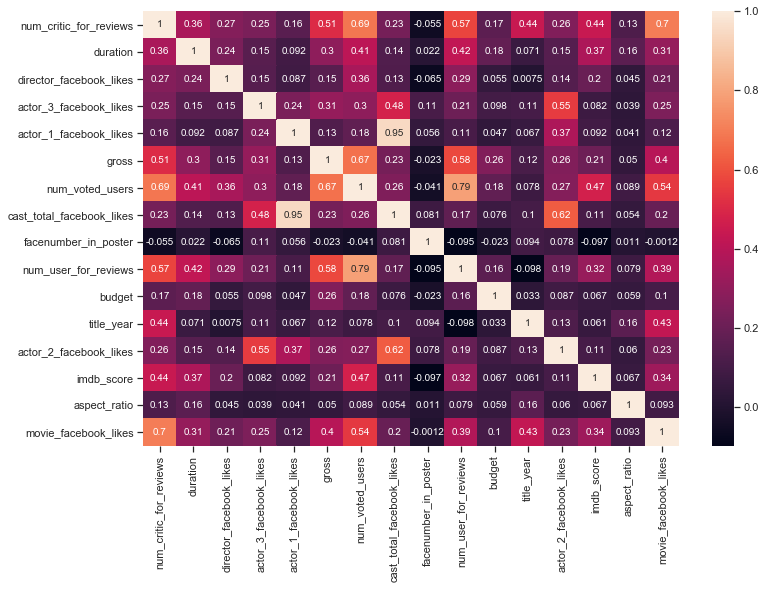

In [148]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)

In [149]:
df1['imdbbins']= pd.cut(df1['imdb_score'], 4, labels = ['1','2','3','4'])
df1.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdbbins
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.000000,4
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,17095.270325,3
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.000000,3
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.000000,4
5,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.000000,3


These bins allow us to brake up the imdb score into sections. I picked 4 sections because I thought this was the best way to divide up that range when predicting the a movie IMDB score.  

In [150]:
#assigning columns to X and Y variables
X = df1.drop((['imdb_score','genres','color','language','imdbbins', 'country', 'content_rating']), axis = 1)
y = df1['imdbbins']

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 5042
Data columns (total 15 columns):
num_critic_for_reviews       2671 non-null float64
duration                     2671 non-null float64
director_facebook_likes      2671 non-null float64
actor_3_facebook_likes       2671 non-null float64
actor_1_facebook_likes       2671 non-null float64
gross                        2671 non-null float64
num_voted_users              2671 non-null int64
cast_total_facebook_likes    2671 non-null float64
facenumber_in_poster         2671 non-null float64
num_user_for_reviews         2671 non-null float64
budget                       2671 non-null float64
title_year                   2671 non-null float64
actor_2_facebook_likes       2671 non-null float64
aspect_ratio                 2671 non-null float64
movie_facebook_likes         2671 non-null float64
dtypes: float64(14), int64(1)
memory usage: 333.9 KB


In [152]:
runs_reg_model = ols("imdb_score~color+movie_facebook_likes+aspect_ratio+actor_1_facebook_likes+title_year+budget+num_user_for_reviews+num_voted_users+gross+director_facebook_likes+num_critic_for_reviews+duration ",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          6.21e-227
Time:                        11:29:44   Log-Likelihood:                -3361.0
No. Observations:                2669   AIC:                             6748.
Df Residuals:                    2656   BIC:                             6825.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

This model has a bunch of variables that I wanted to see would help predict IMDB score. 
- However the R squared endedup being .337 which is not good. 
- Also there were X variables that had high p values meaning that they were not statistically significant.
- This model also had a very high multicollinearity score. 
- Overall this was not a good model for the data

### 2nd Model Regression

This time im going to remove all variables that had a high p-value to hopefully clean up this second model and get better results.

In [153]:
runs_reg_model = ols("imdb_score~color+num_user_for_reviews+num_voted_users+gross+duration ",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          4.72e-206
Time:                        11:29:44   Log-Likelihood:                -3427.8
No. Observations:                2669   AIC:                             6868.
Df Residuals:                    2663   BIC:                             6903.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.2911 

For the 2nd model I cleaned up all of the x variables taht had high pvalue to get a better picture with the regression model. 
- Ended up with a worse R squared at .303
- The X variables Color, Number of user reviews, Gross and Duration all had statistical significace when looking at the p-value which was 0. 
- However because of the high multicollinearity this regression model is not a good fit for what we are trying to find.
- Using regression when there is high multicollinearity gives bad results and are not helpful.

# Classification

In [154]:
 np.random.seed(1)

# KNN

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [156]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.5698254364089775
--------------------------------------------------------
[[  0   2   6   1]
 [  0  11  90  11]
 [  0  45 408  60]
 [  1  15 114  38]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.15      0.10      0.12       112
           3       0.66      0.80      0.72       513
           4       0.35      0.23      0.27       168

    accuracy                           0.57       802
   macro avg       0.29      0.28      0.28       802
weighted avg       0.52      0.57      0.54       802



The KNN model gives me a model with 56.98% accuracy when it comes to predicting IMDB score of movies, which is not great. 408 were correctly predicted for the 3rd bin. overall 457 Movies were predictied correctly while the rest were incorrectly predictied when scored. 

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 5042
Data columns (total 22 columns):
color                        2669 non-null object
num_critic_for_reviews       2671 non-null float64
duration                     2671 non-null float64
director_facebook_likes      2671 non-null float64
actor_3_facebook_likes       2671 non-null float64
actor_1_facebook_likes       2671 non-null float64
gross                        2671 non-null float64
genres                       2671 non-null object
num_voted_users              2671 non-null int64
cast_total_facebook_likes    2671 non-null float64
facenumber_in_poster         2671 non-null float64
num_user_for_reviews         2671 non-null float64
language                     2670 non-null object
country                      2671 non-null object
content_rating               2671 non-null object
budget                       2671 non-null float64
title_year                   2671 non-null float64
actor_2_facebook_likes       2671

# Decision Tree

In [158]:
#Decision Tree

print(y.shape, X.shape)

(2671,) (2671, 15)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_features = 10, max_leaf_nodes = 15)

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=10, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [160]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))



0.7069825436408977
--------------------------------------------------------
[[  0   1   8   0]
 [  0  11 101   0]
 [  0  17 480  16]
 [  0   2  90  76]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.35      0.10      0.15       112
           3       0.71      0.94      0.81       513
           4       0.83      0.45      0.58       168

    accuracy                           0.71       802
   macro avg       0.47      0.37      0.39       802
weighted avg       0.67      0.71      0.66       802



This Decision Tree model is a 70% accuracy. It accurately predicted 567 movies overall out of 802 Movies. This model is doing better than the previous but want to try and see some more accuracy with the modeling. There were bins in each section that accuractely predicted movies correctly on the plus side how ever the first bin did not have one movie predicted correctly. 

<Figure size 1584x1584 with 0 Axes>

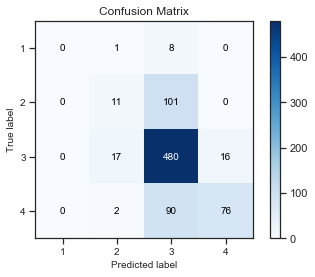

In [161]:
plt.figure(figsize = (22,22))
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

# Rnd Forest Classifier

In [183]:
clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)

In [184]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))


0.7182044887780549
[[  0   4   5   0]
 [  0  22  85   5]
 [  0  20 461  32]
 [  0   2  73  93]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.46      0.20      0.28       112
           3       0.74      0.90      0.81       513
           4       0.72      0.55      0.62       168

    accuracy                           0.72       802
   macro avg       0.48      0.41      0.43       802
weighted avg       0.69      0.72      0.69       802



This was the best so far with an accuracy of 71.82%! Overall it correctly predicted 576 Movies out of 802! THis does mean that 226 movies were incorrectly predicted but this was my best model overall. 

# Clustering 

In [170]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [171]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [172]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA,cluster
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,0,0,0,1,0,0,0,0,1,2
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,0,0,0,1,0,0,0,0,1,2
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,0,0,0,1,0,0,0,1,0,2
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,0,0,0,1,0,0,0,0,1,2
4,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,0,0,0,1,0,0,0,0,1,2


In [173]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA
cluster,,,,,,,,,,,,,,,,,,,,,
0,172.029496,106.281088,708.385149,659.157901,7529.239952,3.072721e+07,75709.877375,10841.291298,1.470869,274.615285,...,0.015976,0.001295,0.01209,0.123921,0.368307,0.471071,0.00734,0.147237,0.087219,0.765544
1,126.666667,116.333333,365.311642,298.763744,404.666667,2.726477e+05,24279.333333,636.333333,0.333333,85.000000,...,0.000000,0.000000,0.00000,0.000000,0.333333,0.666667,0.00000,1.000000,0.000000,0.000000
2,327.778409,122.411932,1745.426475,2059.051136,12689.965909,1.946927e+08,302104.000000,21480.769886,1.360130,817.349432,...,0.042614,0.000000,0.00000,0.264205,0.556818,0.136364,0.00000,0.048295,0.039773,0.911932


In [174]:
df2.groupby(['cluster']).size()

cluster
0    2316
1       3
2     352
dtype: int64

In [175]:
df2.groupby('cluster')['imdb_score'].mean()

cluster
0    6.315415
1    7.233333
2    6.891477
Name: imdb_score, dtype: float64

Using group by clusters created very lopsided clusters, with cluster 1 only receivng 3 movies. Because of this I decided to do Agglomerative Clustering to try and get a better anaylsis. 

In [176]:
agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [177]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,3


In [178]:
df2 = df.join(df1)
df2.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA,cluster
0,Color,723.0,178.0,972.934925,855.0,1000.0,760505847.0,Action,886204,4834.0,...,0,0,0,1,0,0,0,0,1,1
1,Color,302.0,169.0,563.000000,1000.0,40000.0,309404152.0,Action,471220,48350.0,...,0,0,0,1,0,0,0,0,1,1
2,Color,602.0,148.0,972.934925,161.0,11000.0,200074175.0,Action,275868,11700.0,...,0,0,0,1,0,0,0,1,0,1
3,Color,813.0,164.0,22000.000000,23000.0,27000.0,448130642.0,Action,1144337,106759.0,...,0,0,0,1,0,0,0,0,1,1
4,Color,462.0,132.0,475.000000,530.0,640.0,73058679.0,Action,212204,1873.0,...,0,0,0,1,0,0,0,0,1,3


In [179]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated,country_Other,country_UK,country_USA
cluster,,,,,,,,,,,,,,,,,,,,,
0,126.666667,116.333333,365.311642,298.763744,404.666667,2.726477e+05,24279.333333,636.333333,0.333333,85.000000,...,0.000000,0.000000,0.00000,0.000000,0.333333,0.666667,0.000000,1.000000,0.000000,0.000000
1,384.628743,126.467066,1806.443153,2816.239521,13947.077844,2.642040e+08,390428.682635,25704.814371,1.289718,1095.377246,...,0.047904,0.000000,0.00000,0.275449,0.610778,0.065868,0.000000,0.053892,0.077844,0.868263
2,165.700622,105.539810,648.246795,597.994032,7157.210772,2.588569e+07,69068.384834,10197.021159,1.499778,255.655450,...,0.015166,0.001422,0.01327,0.114218,0.359242,0.488626,0.008057,0.154028,0.090521,0.755450
3,255.593350,116.181586,1497.527825,1328.174658,11441.716113,1.047446e+08,180943.227621,17547.936061,1.292539,514.974425,...,0.030691,0.000000,0.00000,0.237852,0.483376,0.248082,0.000000,0.061381,0.030691,0.907928


In [180]:
df2.groupby('cluster')['imdb_score'].mean()


cluster
0    7.233333
1    7.143713
2    6.306303
3    6.529412
Name: imdb_score, dtype: float64

In [181]:
df2.groupby('cluster').size()


cluster
0       3
1     167
2    2110
3     391
dtype: int64

When looking at how these clusters formed we can see that cluster 0 only has three movies in it while cluster 2 has 2000 plus movies in it. This means that my clusters are lopsided and are uneven with how they were grouped. 
 
 Cluster 1 
 
- Average duration is around 2 hours
- Highest Director Facebook likes with an avg of 1800
- Had the higest gross profit avg for its movies
- Highest number of users voted
- It also recieved the highest score ( not counting the lopsided clusters of 0 and 2) with 7.14 average. 

Cluster 3
- Was very similar in comparisons to cluster 3 with the second most in a lot of categories but always trailed behind cluster 1
- Duration was second longest with the average being 116 minutes
- Had the second highest number of users voted 514 average for each of its movies
- It also had an average of 6.529 for its IMDB score


# Storytelling 

Now that we have certain variables that we are looking for we can start applying models to see which will give us that best predictor of a movies success based on the characteristics of the movie. Using these following models and techniques:

- Regression
 
- Classification 
  - KNN model
  - Decision Tree
  - Random Forest Classifier  

- Clustering 

These techniques will allow us to build models to hopefully better predict movie success.


### Regression 
Using regression allowed us to help narrow down the variables to focus on by making a couple of models and looking at their p-values. However when looking at these models they had a very low R Squared value of .33 and .30 and also had extermly high multicolinarity. This showed that for this data set that Regession analysis was not the best way to build a model for predicitng movie success. 

### Classification 

I used a few different models for this. The first one I used was a KNN model. What this model does is take the closest "Neighbor" next to it. This is a lazier method and thus only produced a model with an accuracy of 56%. 

Next I used a Decision Tree model. This models goal is to get a gini score as close to 0 as possible though the variables. In this model I saw an accuracy of 70% which is much improved. It predicted 567 movies out of 802 correctly when it came to predicting IMDB score. 

The last model I used was a Random Forest Classifier Model. This was my best model overall edging out my decision tree model with an accuracy of 71%! This correcly predicted 576 movies correctly out of 802. 
Overall Classification was what I found to be the best way to fit this data into a predicitve model. Traits that were found imporant were as stated above: 
- Number Voted by Users, Duration of Movie, Budget of Movie, Number of User Reviews for the Movie, Gross profit from each movie, and Number of critic reviews of Movie.

### Clustering 





Clustering at first did not produce that great of results. The first try produced bins that had lopsided clusters with almost all the movies in one cluster. Because of this I did not put to much merit into this method for predicting IMDB score. 

However I did then use Agglomerative Clustering and got better results. This time it split the database into 4 bins or clusters. These were more evenly distributed for the most part and got some interesting results for cluster 1 and 3. 
The Avg IMDB score for each cluster as stated above was found to be:

- Cluster (0)    7.233333
- Cluster (1)    7.143713
- Cluster (2)    6.306303
- Cluster (3)    6.529412

### Imporant Highlights for the Client or Movie Production Companies

Working for the client it is imporant to keep in mind what they want to know from all the information you have been working with. The knowledge you have gained from working with the data. In the first part of the project we explored the data and finding which varaibles and correlations were imporant to helping product higher quality movies which recieved a higher IMDB score (Movie success). In this part of the project I explored the data by using machine learning models to help predict with certain variables IMDB scores. Using these models I have gained insight on how to better predict how movies will do when they recieve their score based on several factors that we will dive into.

### Using KBest and also feature imporantce I was able to look at certain variables that were imporant to predicting the IMDB score of movies. Using KBest these were the top x variables that the code said were the best.
- Number of Critic Reviews
- Duration
- Number of Voted Users
- Number of User Reviews
- Number of Facebook 
These were the best preictors of IMDB score accoding to KBest

### When using Feature Improantce these were the top 6 variables ranked in order of imporantce and weighted
- Number Voted by Users
- Duration of Movie
- Budget of Movie
- Number of User Reviews for the Movie
- Gross profit from each movie
- Number of critic reviews of Movie

These gave us slightly different answers and also ranked these in order of improantce. Using these two feature selection techniquest you can narrow down your attention to these variables. 

Based on all the information I was able to use my Random Forest Classifier model to accuractely predict IMDB score of 71% of the model. This was the best one, and using this information movie producers can use all the information stated in this project to help them do a number of things.


- Focus resources on certain variables that produce a higher IMDB score
- Use learning models to better predict which movies will be winners and which ones will be lemons
- Use models to make movies that produce higher IMDB scores
- Create movies with less money while still producing higher scores
 
 - These are just some of the highlights of all the things this project has for Movie Producers. Thank you for hiring me and working for you to help your companys and movie produce the best results. 

In [ ]:
pip install RISE
